<h2><b>This notebook is Not used in main production</b></h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\AAPL.csv", parse_dates= True, index_col= 'Date')

In [1]:
stock_name ='AAPL'
starting_date ='2012-4-1'
ending_date = '2013-11-25'
n =5

In [8]:
df = pd.read_csv(f'E:\Semesters\Fyp prepation\Dataset\AAPL_Stock_Dataset\{stock_name}_STOCK_SENTI_SCORE_{n}_BACKWARD_{starting_date}_TO_{ending_date}_.csv')

In [12]:
df
#df.info()

,Unnamed: 0,Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target,pos_sentm,neg_sentm,sentm_score
0,0,2012-04-03,21.945715,22.057858,21.780714,21.412500,22.093929,22.475714,0.766375,0.233625,4
1,1,2012-04-04,22.057858,21.780714,21.412500,22.093929,22.475714,22.296785,0.365000,0.635000,2
2,2,2012-04-05,21.780714,21.412500,22.093929,22.475714,22.296785,22.631430,0.378000,0.622000,2
3,3,2012-04-09,21.412500,22.093929,22.475714,22.296785,22.631430,22.722500,0.238400,0.761600,2
4,4,2012-04-10,22.093929,22.475714,22.296785,22.631430,22.722500,22.444286,0.634667,0.365333,4
...,...,...,...,...,...,...,...,...,...,...,...
386,386,2013-11-19,18.571787,18.593929,18.862858,18.749643,18.522499,18.555357,0.181800,0.218200,1
387,387,2013-11-20,18.593929,18.862858,18.749643,18.522499,18.555357,18.392857,0.162667,0.504000,1
388,388,2013-11-21,18.862858,18.749643,18.522499,18.555357,18.392857,18.612143,0.522889,0.477111,3
389,389,2013-11-22,18.749643,18.522499,18.555357,18.392857,18.612143,18.564285,0.815750,0.184250,5


<AxesSubplot:>

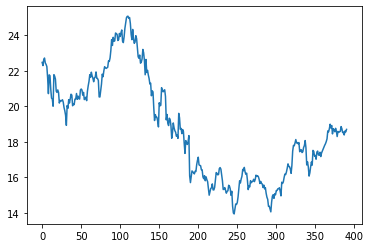

In [10]:
df['Target'].plot()

In [11]:
AAPL_close = df[['Target', 'sentm_score']]
AAPL_close.reset_index(drop=True, inplace= True)
AAPL_close.shape
AAPL_close = pd.DataFrame(AAPL_close)

In [13]:
train = AAPL_close.iloc[:320]
test = AAPL_close.iloc[320:]

In [14]:
train

,Target,sentm_score
0,22.475714,4
1,22.296785,2
2,22.631430,2
3,22.722500,2
4,22.444286,4
...,...,...
315,16.766071,1
316,16.616072,3
317,16.606428,2
318,16.464643,2


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(train)


MinMaxScaler()

In [17]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train

array([[0.76640874, 0.75      ],
       [0.75032885, 0.25      ],
       [0.78040254, 0.25      ],
       [0.78858676, 0.25      ],
       [0.76358438, 0.75      ],
       [0.75639499, 0.5       ],
       [0.74538614, 0.5       ],
       [0.68909057, 0.25      ],
       [0.60853097, 0.25      ],
       [0.70343737, 0.5       ],
       [0.69907242, 0.25      ],
       [0.63199275, 0.5       ],
       [0.58558269, 0.25      ],
       [0.58147431, 0.25      ],
       [0.54482134, 0.25      ],
       [0.70440012, 0.75      ],
       [0.69701823, 0.25      ],
       [0.68193326, 0.5       ],
       [0.62088765, 0.25      ],
       [0.61495011, 0.25      ],
       [0.62730671, 0.5       ],
       [0.61395501, 0.5       ],
       [0.56077281, 1.        ],
       [0.57434926, 0.75      ],
       [0.57017681, 0.75      ],
       [0.57338624, 0.75      ],
       [0.57768703, 1.        ],
       [0.56545877, 0.        ],
       [0.53820961, 0.5       ],
       [0.52200139, 0.25      ],
       [0.

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [20]:
length = 21
batch_size = 64
generator = TimeseriesGenerator(scaled_train,scaled_train, length = length, batch_size = batch_size)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout


In [22]:
n_features = 2


In [23]:
model = Sequential()

model.add(SimpleRNN(30, input_shape = (length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer ='adam', loss= 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                990       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint


In [48]:
tensorBoard = TensorBoard(log_dir= f'logs/AAPL_Pred2')

filepath = "RNN_Final-{epoch:02d}-{val_accuracy:.3f}"

checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_accuracy',
                                                      verbose =1, save_best_only =True, mode ='max'))

In [28]:
model.fit(generator, epochs=100, shuffle= False, )

Epoch 1/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0595
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0561
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0546
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0518
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0563
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0545
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0537
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0542
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0546
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0581
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0521
Epoch 13/100
5/5 [==============================] - 0s 6ms/s

<AxesSubplot:>

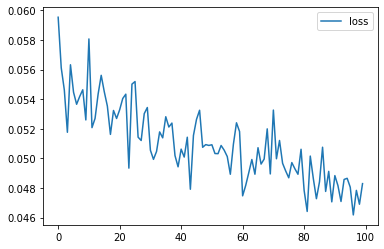

In [29]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [40]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1,length,2))
first_eval_batch

array([[[0.09692841, 0.25      ],
        [0.11798309, 0.        ],
        [0.11846451, 0.        ],
        [0.12732293, 0.25      ],
        [0.12767593, 0.25      ],
        [0.1323298 , 0.        ],
        [0.11483773, 0.5       ],
        [0.09134387, 0.        ],
        [0.16041338, 0.5       ],
        [0.15396215, 0.        ],
        [0.16195397, 0.25      ],
        [0.18377891, 0.        ],
        [0.20152782, 0.        ],
        [0.19899212, 0.25      ],
        [0.21231173, 0.        ],
        [0.23111973, 0.25      ],
        [0.25329775, 0.        ],
        [0.23981773, 0.5       ],
        [0.23895105, 0.25      ],
        [0.22620919, 0.25      ],
        [0.20515442, 0.        ]]])

In [41]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 83ms/step


array([[0.2573404]], dtype=float32)

In [96]:
test_prediction =[]

first_eval_batch = scaled_train[-length: ]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    # print(current_batch[:,1:,:],'\n')
    # print(current_pred)
    # break
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)


1/1 [==============================] - 0s 30ms/step


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 1

In [86]:
list1 =np.array([[[2],[3],[4],[6]]])

list1[:,1:,:]

array([[[3],
        [4],
        [6]]])

In [88]:
current_batch[:,1:,:]

array([[[0.11798309, 0.        ],
        [0.11846451, 0.        ],
        [0.12732293, 0.25      ],
        [0.12767593, 0.25      ],
        [0.1323298 , 0.        ],
        [0.11483773, 0.5       ],
        [0.09134387, 0.        ],
        [0.16041338, 0.5       ],
        [0.15396215, 0.        ],
        [0.16195397, 0.25      ],
        [0.18377891, 0.        ],
        [0.20152782, 0.        ],
        [0.19899212, 0.25      ],
        [0.21231173, 0.        ],
        [0.23111973, 0.25      ],
        [0.25329775, 0.        ],
        [0.23981773, 0.5       ],
        [0.23895105, 0.25      ],
        [0.22620919, 0.25      ],
        [0.20515442, 0.        ]]])

In [63]:
test_prediction

[array([0.75161684], dtype=float32),
 array([0.75418925], dtype=float32),
 array([0.76813716], dtype=float32),
 array([0.77260554], dtype=float32),
 array([0.7820623], dtype=float32),
 array([0.78532845], dtype=float32),
 array([0.79181546], dtype=float32),
 array([0.8017253], dtype=float32),
 array([0.8044668], dtype=float32),
 array([0.8094045], dtype=float32),
 array([0.8201901], dtype=float32),
 array([0.82090634], dtype=float32),
 array([0.8317371], dtype=float32),
 array([0.8253319], dtype=float32),
 array([0.8387766], dtype=float32),
 array([0.83211017], dtype=float32),
 array([0.8408433], dtype=float32),
 array([0.83751047], dtype=float32),
 array([0.83914053], dtype=float32),
 array([0.84088355], dtype=float32),
 array([0.8425748], dtype=float32),
 array([0.8460038], dtype=float32),
 array([0.8464841], dtype=float32),
 array([0.84440196], dtype=float32),
 array([0.852854], dtype=float32),
 array([0.8455883], dtype=float32),
 array([0.8516321], dtype=float32),
 array([0.8462578

In [64]:
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction


array([[19.12751034],
       [19.18910641],
       [19.5230865 ],
       [19.63008109],
       [19.85652138],
       [19.93472889],
       [20.09005924],
       [20.32734927],
       [20.39299295],
       [20.5112255 ],
       [20.76948428],
       [20.78663522],
       [21.04597584],
       [20.89260507],
       [21.21453511],
       [21.05490882],
       [21.26402262],
       [21.18421805],
       [21.22324973],
       [21.264986  ],
       [21.30548201],
       [21.3875887 ],
       [21.39909069],
       [21.34923352],
       [21.55161654],
       [21.37764096],
       [21.52235848],
       [21.39367153],
       [21.51283177],
       [21.45342077],
       [21.45917962],
       [21.47796044],
       [21.47005505],
       [21.37437833],
       [21.48363508]])

In [65]:
test['predictions'] = true_prediction
test

<ipython-input-65-a5efbe04fc23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_prediction


,Close,predictions
2230,18.537500,19.127510
2231,18.571787,19.189106
2232,18.593929,19.523086
2233,18.862858,19.630081
2234,18.749643,19.856521
2235,18.522499,19.934729
2236,18.555357,20.090059
2237,18.392857,20.327349
2238,18.612143,20.392993
2239,18.564285,20.511225


<AxesSubplot:>

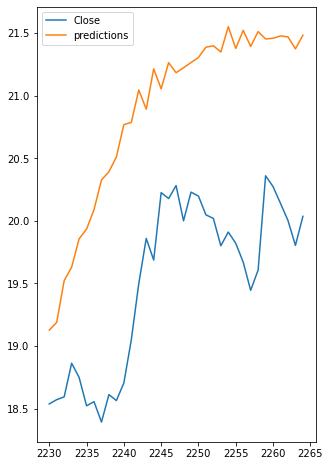

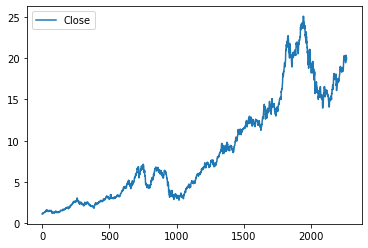

In [70]:
test.plot(figsize=(5,8))
AAPL_close.plot()